In [71]:
#Declare dependencies
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Puerto Rico': 'PR',
    'District of Columbia':'DC'
}

In [65]:
##Read GeoJSON data into geopandas dataframe
usa = gpd.read_file('us_states_geo.json')
# Read total medicare discharges by state into a dataframe
medbystatedf = pd.read_csv('totalmedicarebystate.csv')
medbystatedf = medbystatedf.rename(columns={'AK':'State','18345349.693582997':'Sum of Medicare Payments($)'})
# Iterate over rows in geoDF to replace state name's with abbrev's
# this will make the dataframe compatible with the Medicare data
for row, index in usa.iterrows():
    #Drop Puerto Rico from the geodataframe as we have no medicare data for it
    if index['NAME'] == 'Puerto Rico':
        usa.drop(labels=row,axis=0,inplace=True)
    else:
        usa.replace(to_replace=index['NAME'],value=us_state_abbrev[index['NAME']],inplace=True)
usa.head()
# Merge geoDF and medicareDF on the State Name column
usa['NAME'] = usa['NAME'].astype(str)
medbystatedf['State'] = medbystatedf['State'].astype(str)
medbystate_wgeo_df = usa.merge(right=medbystatedf,how='outer',left_on='NAME',right_on='State')
medbystate_wgeo_df.drop(columns=['GEO_ID','STATE','NAME','LSAD','CENSUSAREA'],inplace=True)
medbystate_wgeo_df.head()
##Add in data from state-by-state dataframes
#usa_new = usa.drop(columns=['GEO_ID','STATE','LSAD','CENSUSAREA'])
#**common_drg_bystatedf = pd.read_csv(**)
#**total_pay_bystatedf = pd.read_csv(**)
##Merge geoDF into other DF's to generate heatmaps

,geometry,State,Sum of Medicare Payments($)
0,"(POLYGON ((-67.619761 44.519754, -67.61541 44....",ME,3.919304e+07
1,"(POLYGON ((-70.832044 41.606504, -70.823735 41...",MA,2.519025e+08
2,"(POLYGON ((-88.684434 48.115785, -88.675628 48...",MI,3.106513e+08
3,"POLYGON ((-104.057698 44.997431, -104.250145 4...",MT,2.471109e+07
4,"POLYGON ((-114.0506 37.000396, -114.049995 36....",NV,6.763138e+07


<class 'geopandas.geodataframe.GeoDataFrame'>


/anaconda3/envs/data/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


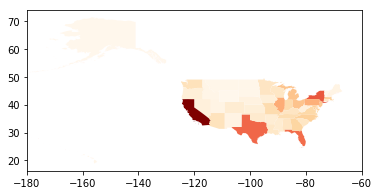

In [117]:
#Create plot of GeoMap data 
#fig, ax = plt.subplots()
output = medbystate_wgeo_df.plot(cmap='OrRd',column='Sum of Medicare Payments($)').axis(xmax=-60,xmin=-180)
print(type(medbystate_wgeo_df))
#plt.savefig('SpendingByState',dpi=1000)